In [1]:
from pyforest import*
lazy_imports()

['import seaborn as sns',
 'from fbprophet import Prophet',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import fbprophet',
 'import sys',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.linear_model import LogisticRegression',
 'import imutils',
 'import re',
 'import glob',
 'import gensim',
 'import spacy',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.cluster import KMeans',
 'import statistics',
 'from sklearn.impute import SimpleImputer',
 'import plotly.graph_objs as go',
 'import cv2',
 'import tqdm',
 'from sklearn.preprocessing import StandardScaler',
 'from PIL import Image',
 'import tensorflow as tf',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.ensemble import RandomForestClassifier',
 'import pickle'

In [2]:
df = pd.read_csv('diabetes.csv')

<IPython.core.display.Javascript object>

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
new_column_names = {
    'Pregnancies': 'preg',
    'Glucose': 'plas',
    'BloodPressure': 'pres',
    'SkinThickness': 'skin',
    'Insulin': 'test',
    'BMI': 'mass',
    'DiabetesPedigreeFunction': 'pedi',
    'Age': 'age',
    'Outcome': 'class'
}

df = df.rename(columns=new_column_names)

In [7]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().values.any()

False

<IPython.core.display.Javascript object>

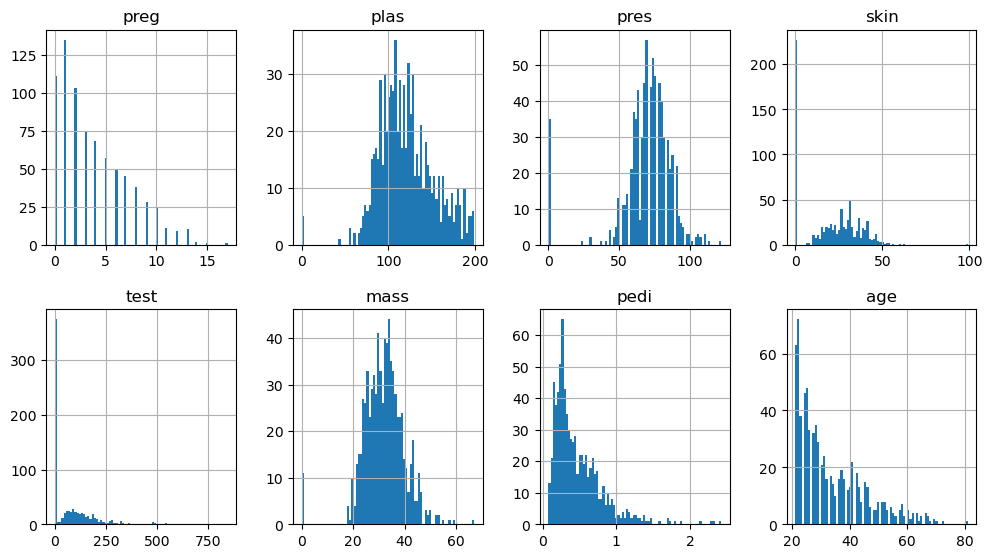

In [9]:
columns = list(df)[0:-1]
df[columns].hist(bins=80, figsize=(12,50), layout=(14,4))
plt.show()

#### *Identify Correlation in the data*

In [10]:
mask = np.triu(np.ones_like(df.corr()))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

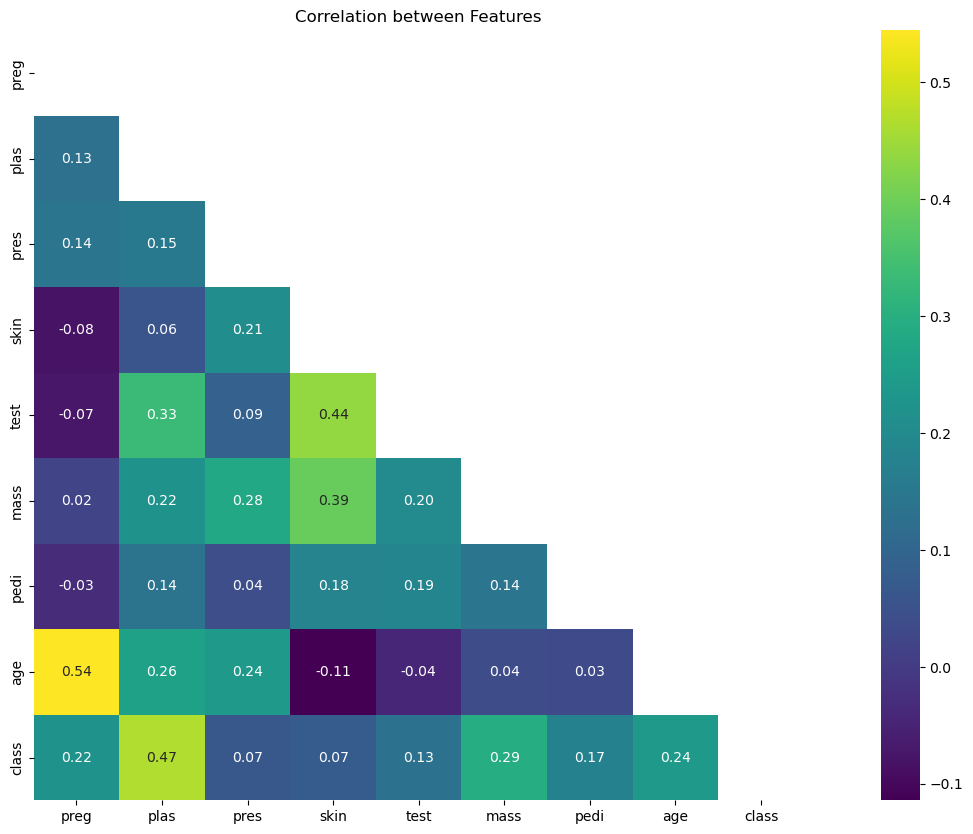

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), mask=mask, cmap='viridis', annot=True, fmt=".2f", square=True)
plt.title('Correlation between Features')
plt.show()

'''
The only features that are correlated is the age and pregnancy and it's okay cause the younger you are the less pregnant you should be
'''

<IPython.core.display.Javascript object>

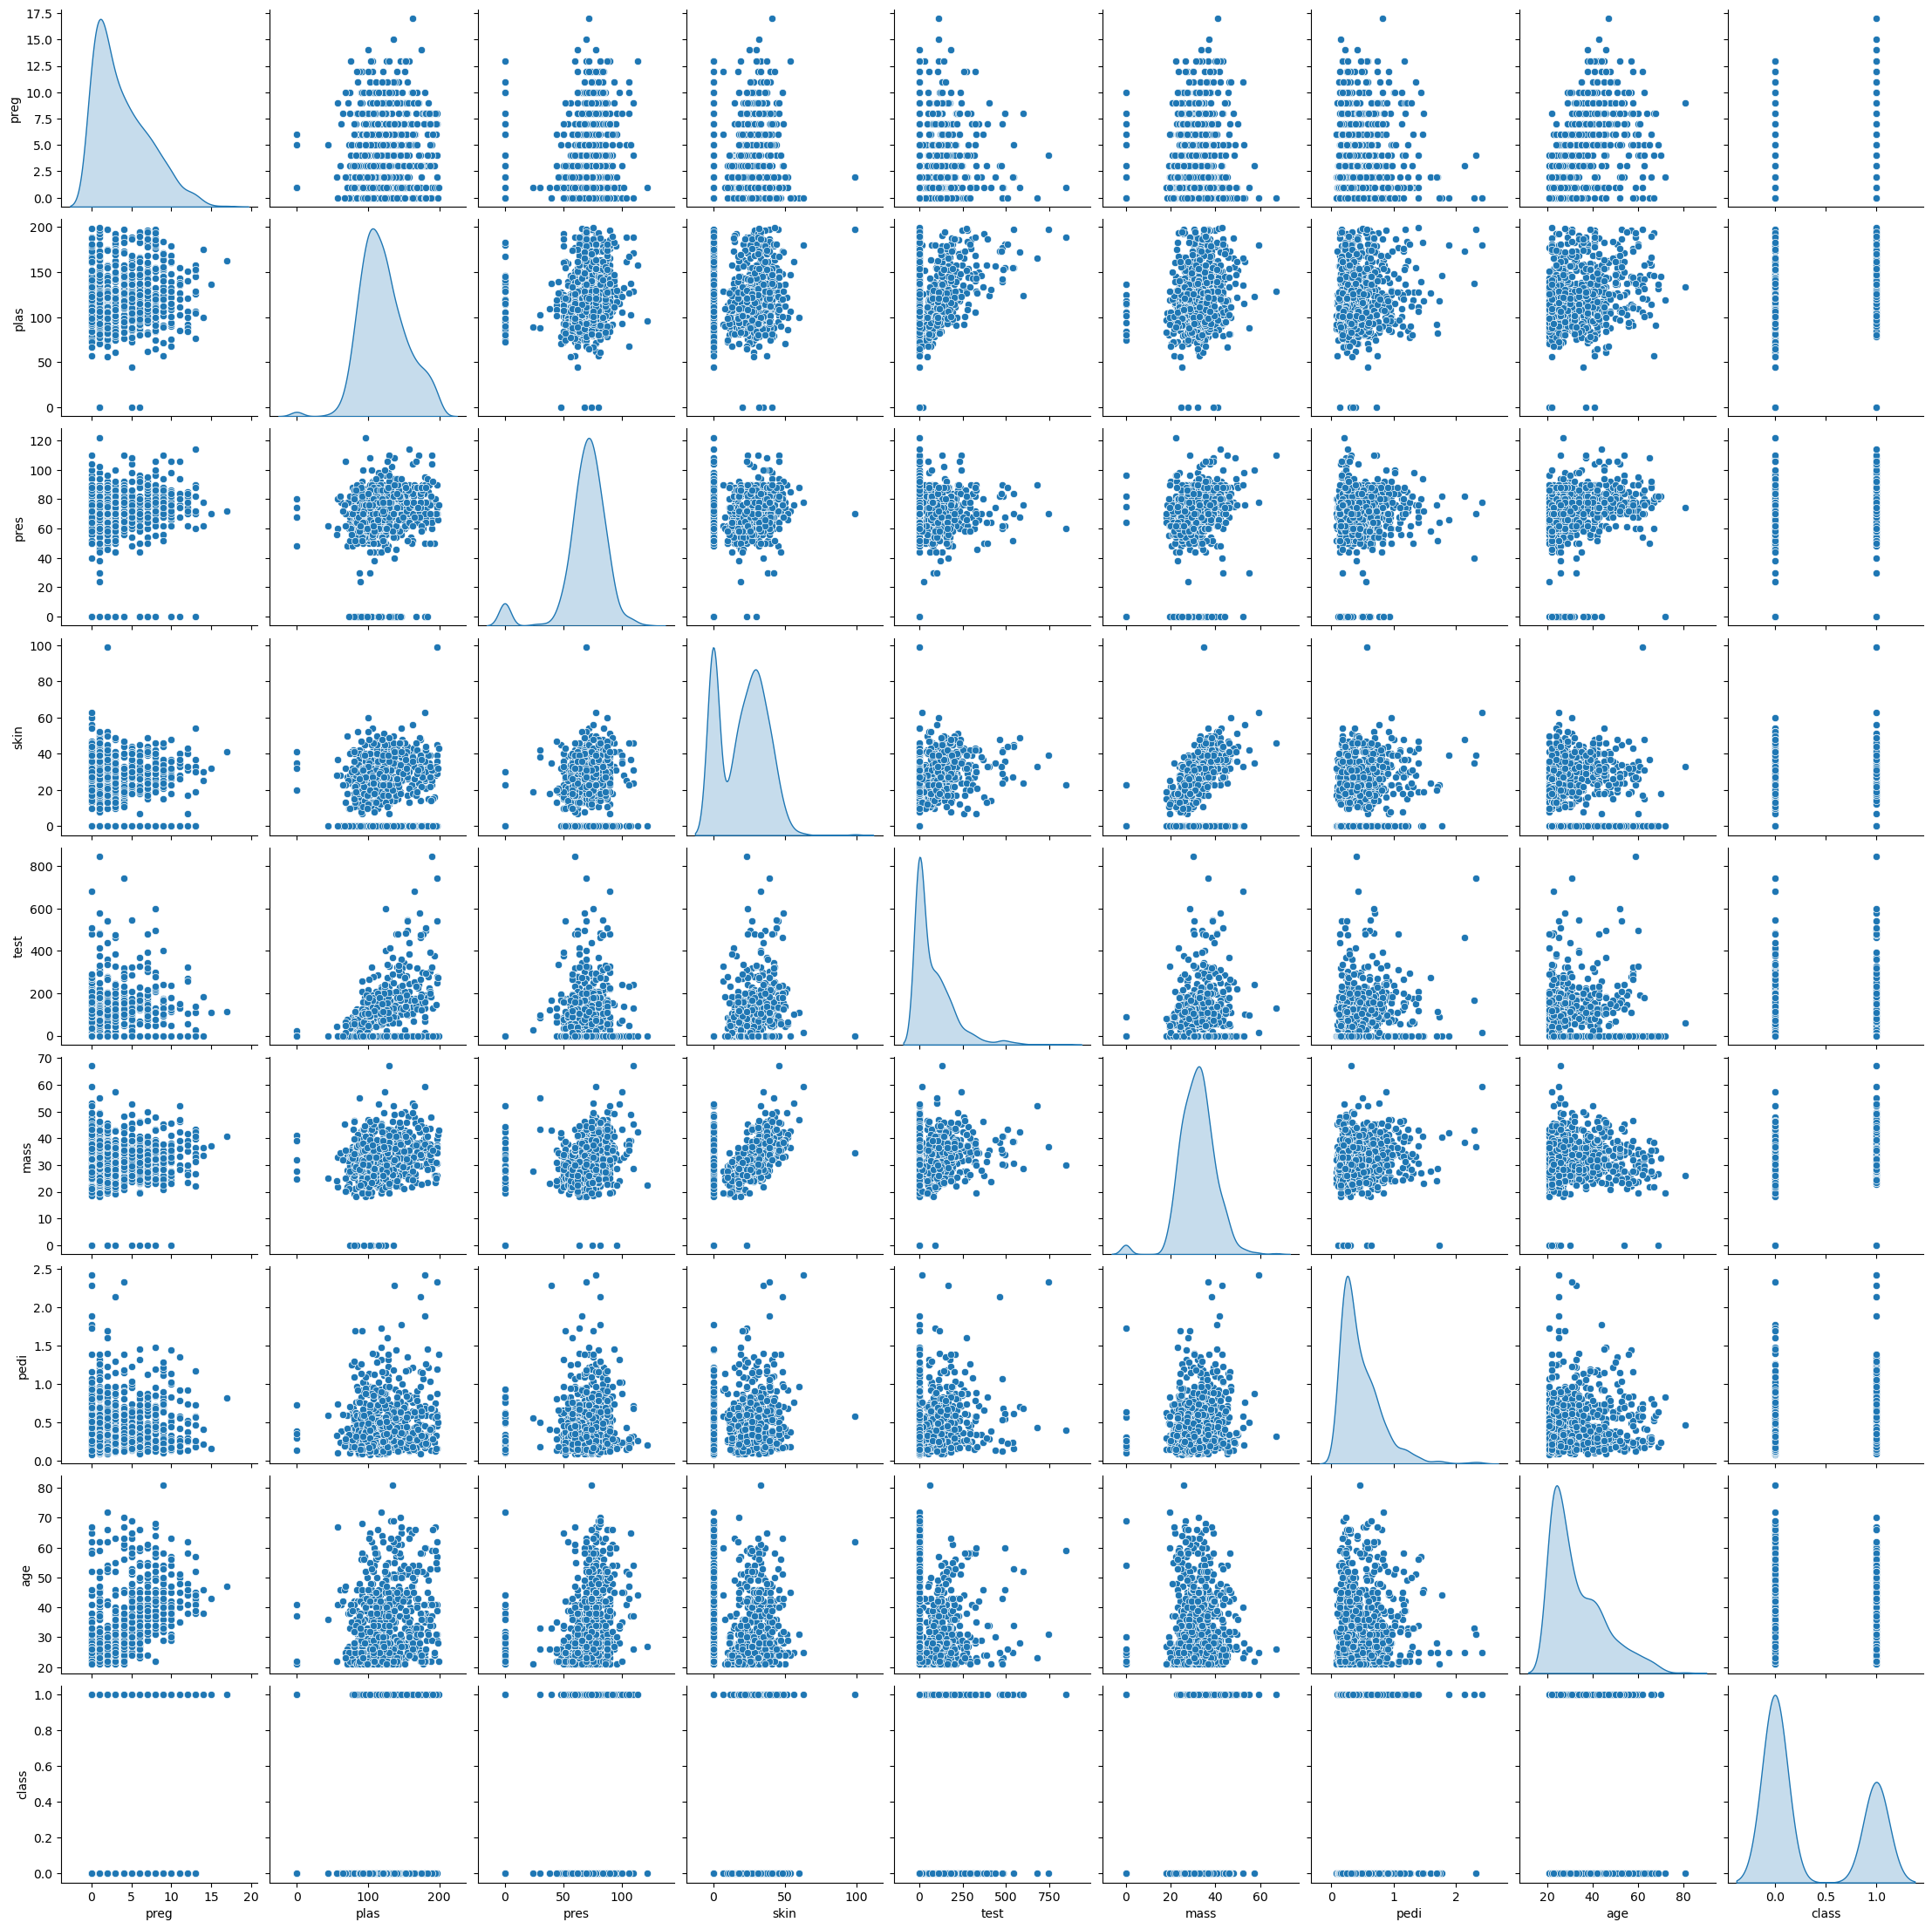

In [12]:
sns.pairplot(df,diag_kind="kde")

##### The target column distribution    

In [13]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

##### So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabete

##### Its not a perfect distribution but still it is a good distribution

In [14]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### *Splitting the data*

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [17]:
x_train.head()

,preg,plas,pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [18]:
# A check for the split of the data
print("{}% data is in the training set".format((len(x_train)/len(df)) * 100))
print("{}% data is in the test set".format((len(x_test)/len(df)) * 100))

69.921875% data is in the training set
30.078125% data is in the test set


#### Let's replace the zero's with mean

In [19]:
from sklearn.impute import SimpleImputer

replace_ = SimpleImputer(missing_values=0, strategy='mean')

cols = x_train.columns  # Get the column names

x_train = pd.DataFrame(replace_.fit_transform(x_train))
x_test = pd.DataFrame(replace_.fit_transform(x_test))

x_train.columns = cols  # Assign column names to x_train
x_test.columns = cols  # Assign column names to x_test

    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### *LOGISTIC REGRESSION MODEL*

In [20]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [22]:
model.score(x_train, y_train)

0.7672253258845437

In [23]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [24]:
model_score = model.score(x_test, y_test)
model_score

0.7792207792207793

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<IPython.core.display.Javascript object>

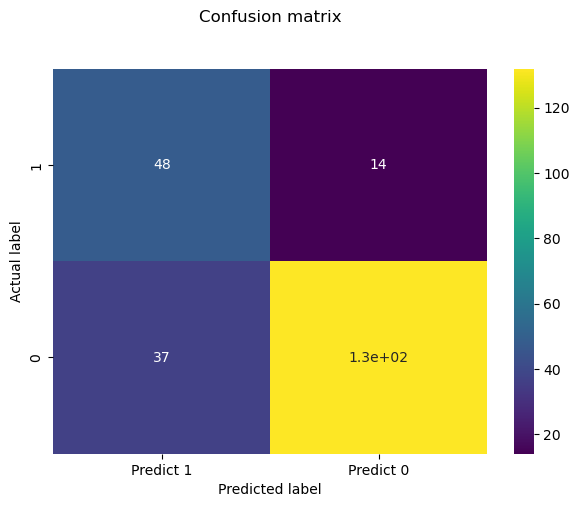

In [26]:
cm = metrics.confusion_matrix(y_predict,y_test, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in ['1',0]],
                     columns = [c for c in ['Predict 1', 'Predict 0']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, cmap='viridis', annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB

#### *Naive Bayes Algorithm*

In [28]:
model_ =  GaussianNB()
model_.fit(x_train,y_train)

GaussianNB()

In [29]:
train_prediction = model_.predict(x_train)
train_prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [30]:
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, train_prediction)))

Model Accuracy: 0.7393


In [31]:
test_prediction =model_.predict(x_test)
test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [32]:
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, test_prediction))) 

Model Accuracy: 0.7706


<IPython.core.display.Javascript object>

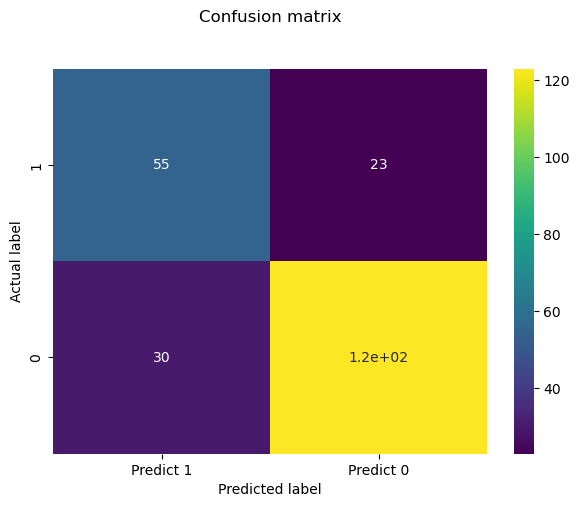

In [33]:
cm = metrics.confusion_matrix(test_prediction,y_test, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in ['1',0]],
                     columns = [c for c in ['Predict 1', 'Predict 0']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, cmap='viridis', annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
from sklearn.metrics import classification_report


In [35]:
print("Classification Report")
print(metrics.classification_report(y_test,test_prediction, labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [37]:
from sklearn.svm import SVC

In [40]:
model1 = SVC(kernel='linear', probability=True)

model1.fit(x_train,y_train)

probas = model.predict_proba(x_test)
probas1 = model1.predict_proba(x_test)

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
roc_auc = auc(fpr, tpr)
print('Area under the Logistic regression ROC curve: %f' % roc_auc)


Area under the ROC curve: 0.856084


In [48]:

fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1[:,1])
roc_auc1 = auc(fpr1, tpr1)
print('Area under the SVC ROC curve: %f' % roc_auc1)

Area under the SVC ROC curve: 0.870911


In [49]:
import matplotlib.pyplot as plt

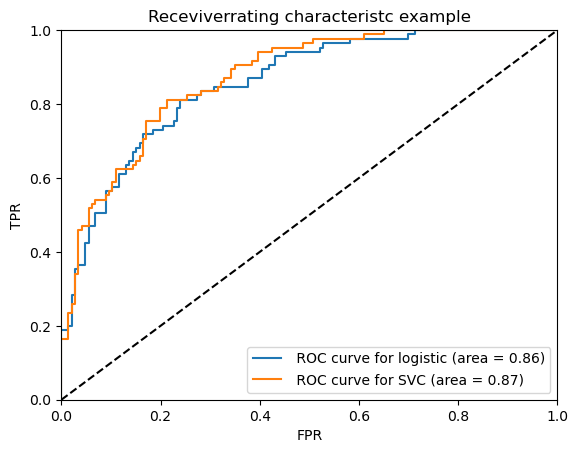

In [50]:
plt.clf()
plt.plot(fpr, tpr, label=' ROC curve for logistic (area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, label=' ROC curve for SVC (area = %0.2f)' % roc_auc1)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receviverrating characteristc example')
plt.legend(loc='lower right')
plt.show()